# ML Tech Talk 

- Demonstração de uso simples e sem verbosidade do AutoML do H2O.ai nos datasets Iris e Boston Housing

In [2]:
import h2o
import pandas as pd
import torch
from h2o.automl import H2OAutoML
from sklearn import datasets

In [3]:
h2o.init(ip='h2o.data.hurb.com', https=False, port=80) 

Checking whether there is an H2O instance running at http://h2o.data.hurb.com:80 . connected.


H2O_cluster_uptime:,10 days 3 hours 43 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.1
H2O_cluster_version_age:,1 month and 25 days
H2O_cluster_name:,root
H2O_cluster_total_nodes:,3
H2O_cluster_free_memory:,25.28 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### 1) Classificação (Iris Dataset)

**Importanto os dados**

In [4]:
iris_data = h2o.get_frame("iris_dataset.hex")

iris_data.head(3)

sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target
5.1,3.5,1.4,0.2,0
4.9,3,1.4,0.2,0
4.7,3.2,1.3,0.2,0


In [5]:
train_iris, test_iris = iris_data.split_frame(ratios=[.7])

x = train_iris.columns
y = 'target'
x.remove(y)

**Treinamento**

In [7]:
aml_iris = H2OAutoML(seed=1,
                project_name = 'iris_tutorial_3',
                max_models = 10)

aml_iris.train(x=x,
          y=y,
          training_frame=train_iris,
          leaderboard_frame=test_iris)

AutoML progress: |█████████████████
22:58:35.850: Skipping training of model GBM_5_AutoML_20201203_225733 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20201203_225733.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 102.0.


███████████████████████████████████████| 100%


Recuperando o leaderboard com todas as métricas...

In [8]:
lb_iris = h2o.automl.get_leaderboard(aml_iris, extra_columns = 'ALL')
lb_iris.head(3)

model_id,mean_per_class_error,logloss,rmse,mse,training_time_ms,predict_time_per_row_ms
DeepLearning_1_AutoML_20201203_225733,0.0392157,0.189649,0.21763,0.047363,102,0.222328
GBM_2_AutoML_20201203_225733,0.0404412,0.15164,0.200992,0.0403978,1376,0.157264
GBM_4_AutoML_20201203_225733,0.0404412,0.15217,0.196775,0.0387203,1607,0.177716


In [9]:
aml_iris.leaderboard.nrows

12

**Predição**

In [11]:
aml_iris.leader.predict(test_iris.head(2))

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,p0,p1,p2
0,0.974531,0.0252823,0.000187116
0,0.987324,0.0125284,0.000147825


In [12]:
aml_iris.leader.confusion_matrix(test_iris)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,15.0,0.0,0.0,0.000000,0 / 15
1,0.0,16.0,0.0,0.000000,0 / 16
2,0.0,2.0,15.0,0.117647,2 / 17
3,15.0,18.0,15.0,0.041667,2 / 48


**Explorando o modelo**

In [15]:
aml_iris.leader

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_1_AutoML_20201203_225733


Status of Neuron Layers: predicting target, 3-class classification, multinomial distribution, CrossEntropy loss, 303 weights/biases, 8.2 KB, 2,091 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,4,Input,0,,,,,,,,,
1,,2,10,Rectifier,0,0,0,0.00166407,0.000620182,0,0.0584292,0.375924,0.515281,0.0662295
2,,3,10,Rectifier,0,0,0,0.00221856,0.0015208,0,-0.0206584,0.324211,0.9971,0.1093
3,,4,10,Rectifier,0,0,0,0.00769425,0.0235079,0,-0.0231515,0.322429,0.995646,0.076438
4,,5,3,Softmax,,0,0,0.0136325,0.0572751,0,-0.302536,1.53536,-0.000243156,0.0409031




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.05032116511594122
RMSE: 0.22432379525128676
LogLoss: 0.1958735767448608
Mean Per-Class Error: 0.040106951871657755

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,35.0,0.0,0.0,0.000000,0 / 35
1,0.0,33.0,1.0,0.029412,1 / 34
2,0.0,3.0,30.0,0.090909,3 / 33
3,35.0,36.0,31.0,0.039216,4 / 102



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.960784
1,2,1.000000
2,3,1.000000



ModelMetricsMultinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.08842050086392281
RMSE: 0.2973558488813072
LogLoss: 0.3093439559230792
Mean Per-Class Error: 0.0701128936423054

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,35.0,0.0,0.0,0.000000,0 / 35
1,0.0,32.0,2.0,0.058824,2 / 34
2,0.0,5.0,28.0,0.151515,5 / 33
3,35.0,37.0,30.0,0.068627,7 / 102



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,0.931373
1,2,1.000000
2,3,1.000000



Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.93190473,0.074146695,0.95238096,0.85714287,1.0,1.0,0.85
1,err,0.06809524,0.074146695,0.04761905,0.14285715,0.0,0.0,0.15
2,err_count,1.4,1.5165751,1.0,3.0,0.0,0.0,3.0
3,logloss,0.3087615,0.060375515,0.32056692,0.35636598,0.2512867,0.24119806,0.37438986
4,max_per_class_error,0.17142858,0.18626292,0.14285715,0.2857143,0.0,0.0,0.42857143
5,mean_per_class_accuracy,0.93333334,0.07221786,0.95238096,0.85714287,1.0,1.0,0.85714287
6,mean_per_class_error,0.06666667,0.07221786,0.04761905,0.14285715,0.0,0.0,0.14285715
7,mse,0.08820097,0.026358845,0.09342725,0.10536663,0.06335872,0.059119023,0.11973324
8,r2,0.86832136,0.035677023,0.8598591,0.84195006,0.9021487,0.9086965,0.82895255
9,rmse,0.29422832,0.04514807,0.30565873,0.32460228,0.25171158,0.24314404,0.3460249



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error
0,,2020-12-03 22:58:36,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2020-12-03 22:58:36,0.544 sec,5153 obs/sec,1.313725,1,134.0,0.837602,5.469741,-0.052972,0.823529
2,,2020-12-03 22:58:36,0.572 sec,41820 obs/sec,20.500000,5,2091.0,0.224324,0.195874,0.924475,0.039216



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,petal width in cm,1.000000,1.000000,0.306194
1,sepal length in cm,0.931486,0.931486,0.285215
2,sepal width in cm,0.685178,0.685178,0.209797
3,petal length in cm,0.649243,0.649243,0.198794


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_1_AutoML_20201203_225733


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,15.0,0.0,0.0,0.000000,0 / 15
1,0.0,16.0,0.0,0.000000,0 / 16
2,0.0,2.0,15.0,0.117647,2 / 17
3,15.0,18.0,15.0,0.041667,2 / 48


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

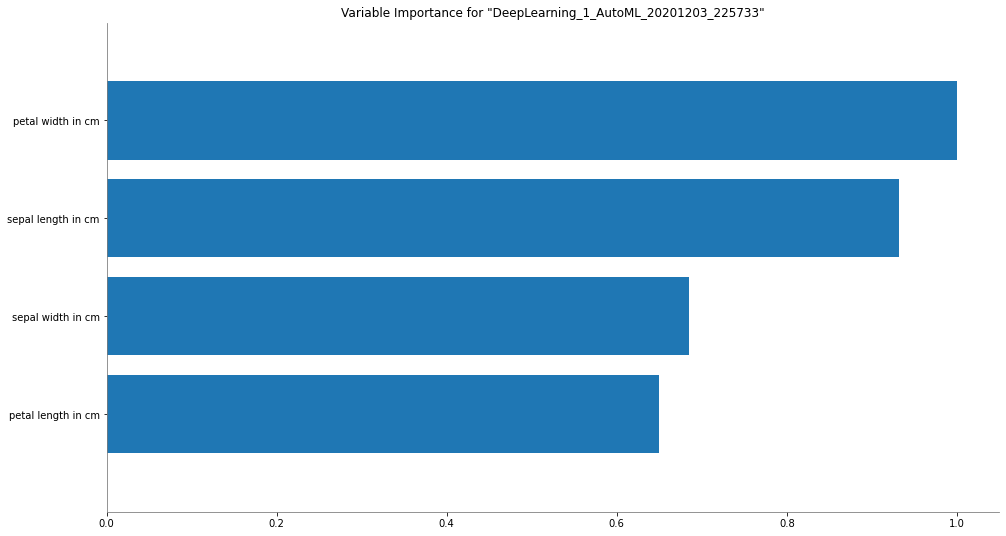

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

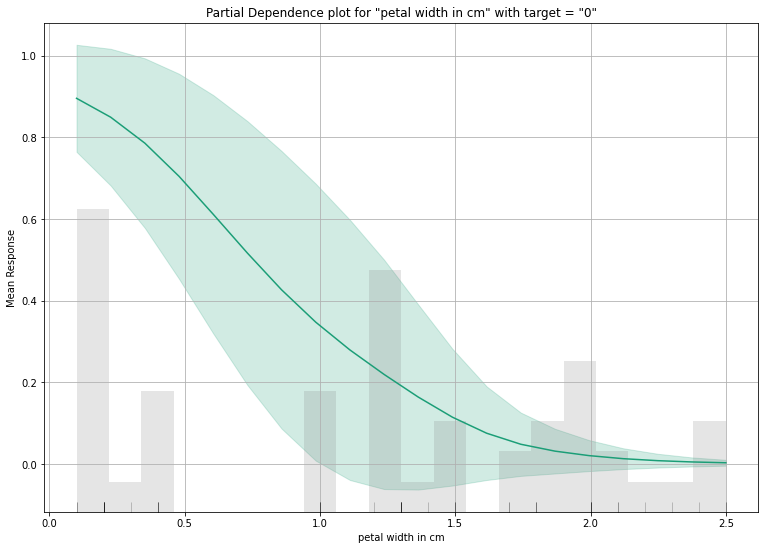

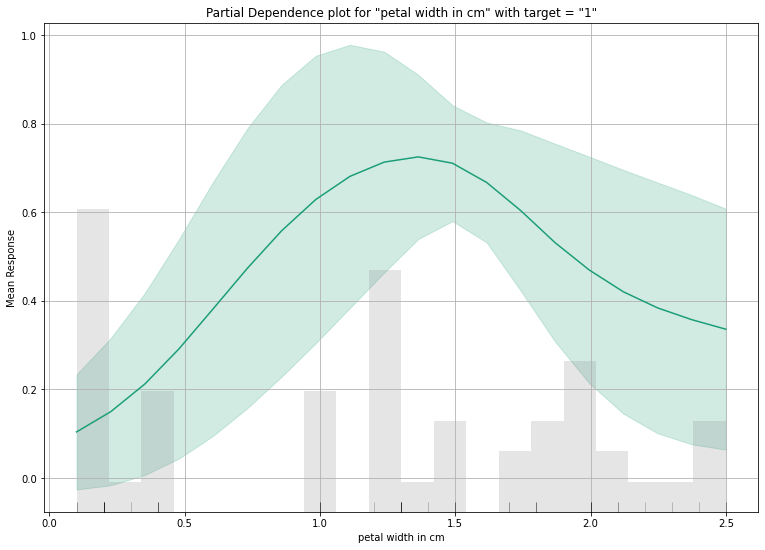

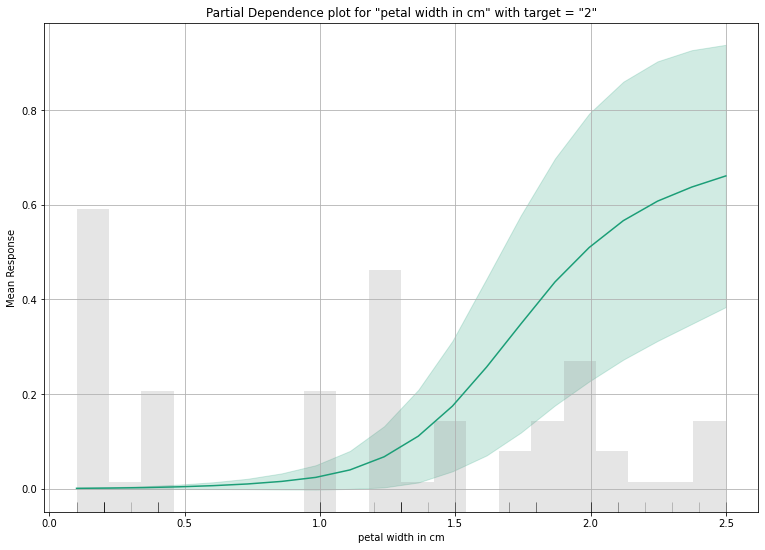

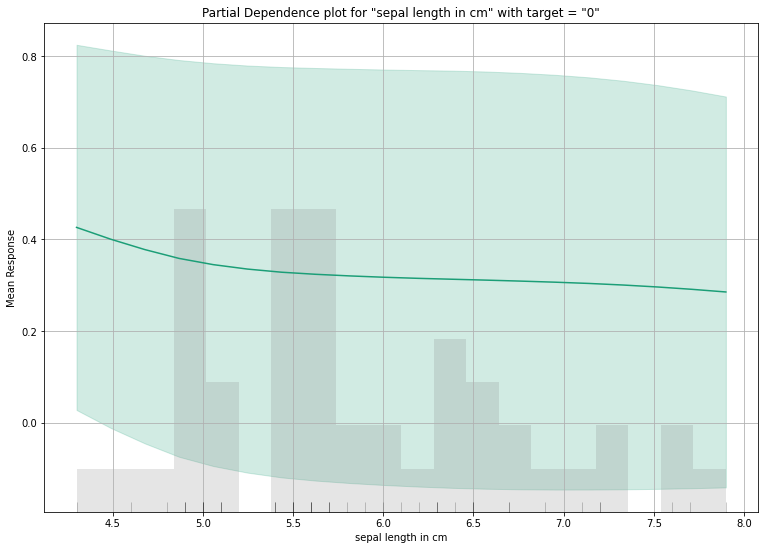

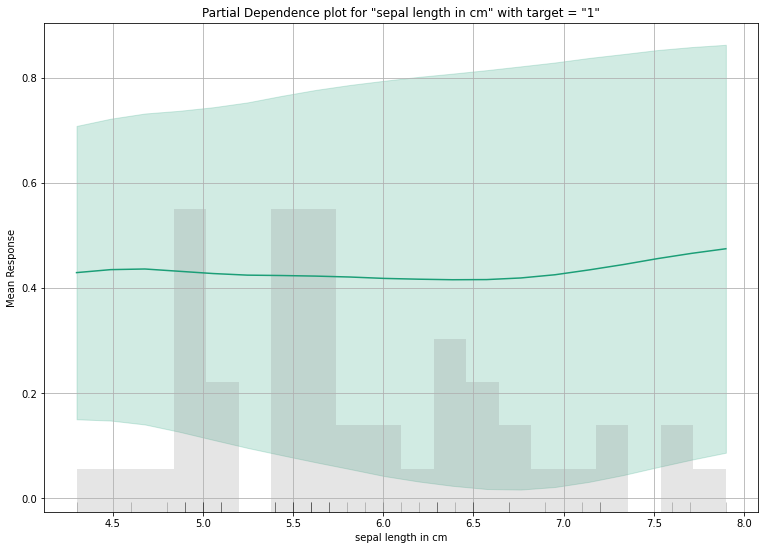

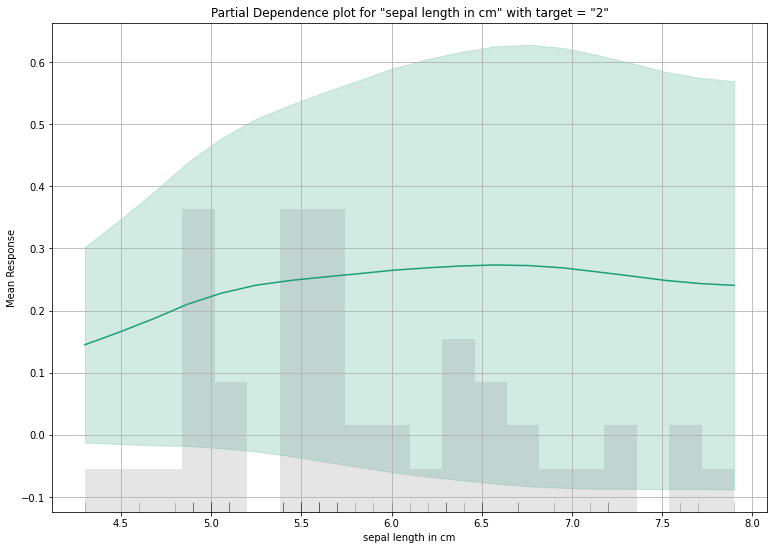

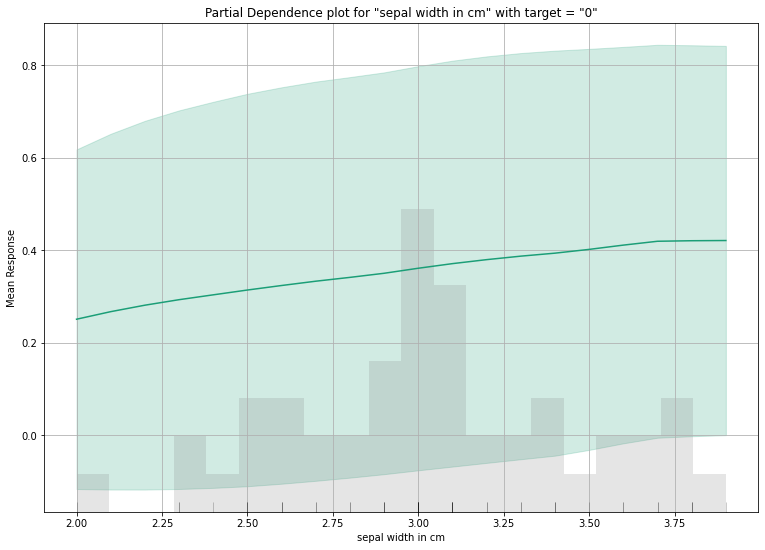

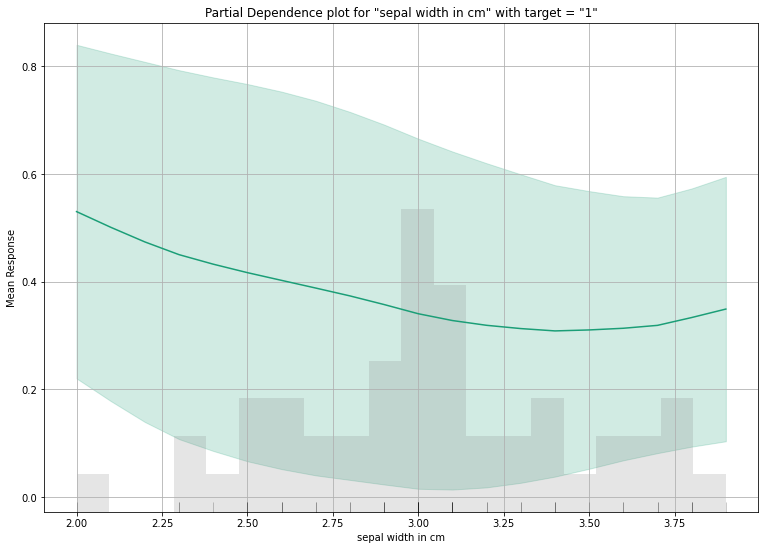

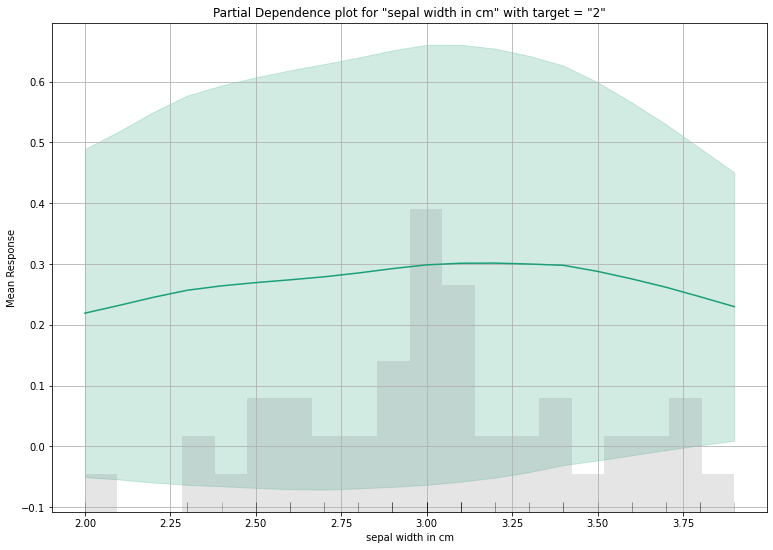

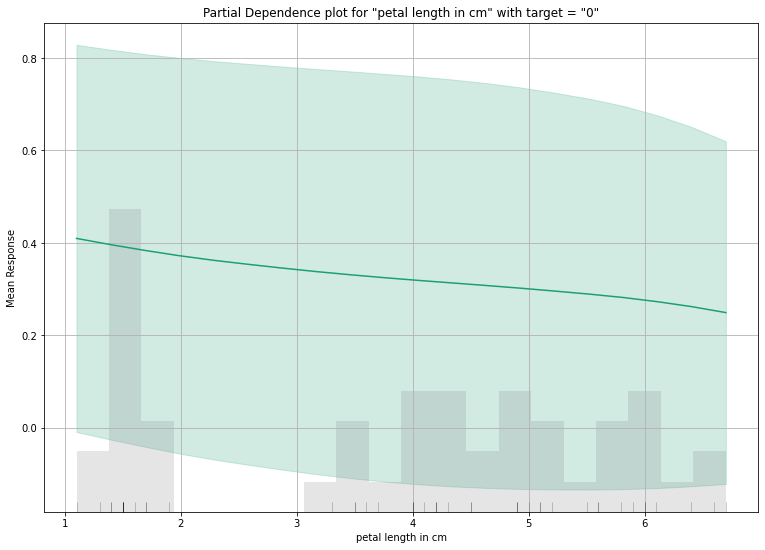

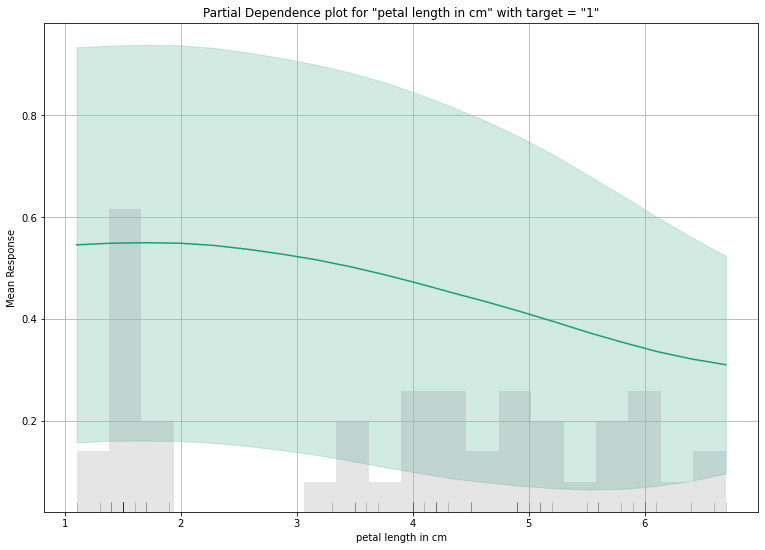

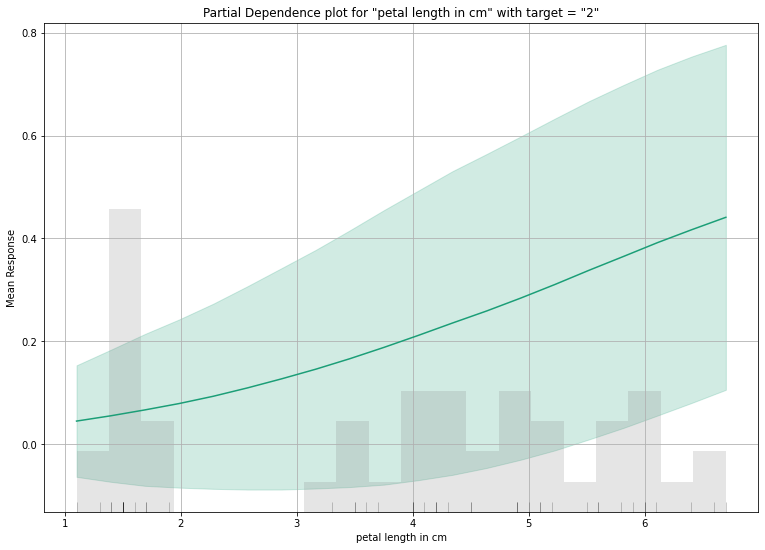

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_1_AutoML_20201203_225733


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,0,1,2,Error,Rate
0,15.0,0.0,0.0,0.000000,0 / 15
1,0.0,16.0,0.0,0.000000,0 / 16
2,0.0,2.0,15.0,0.117647,2 / 17
3,15.0,18.0,15.0,0.041667,2 / 48


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

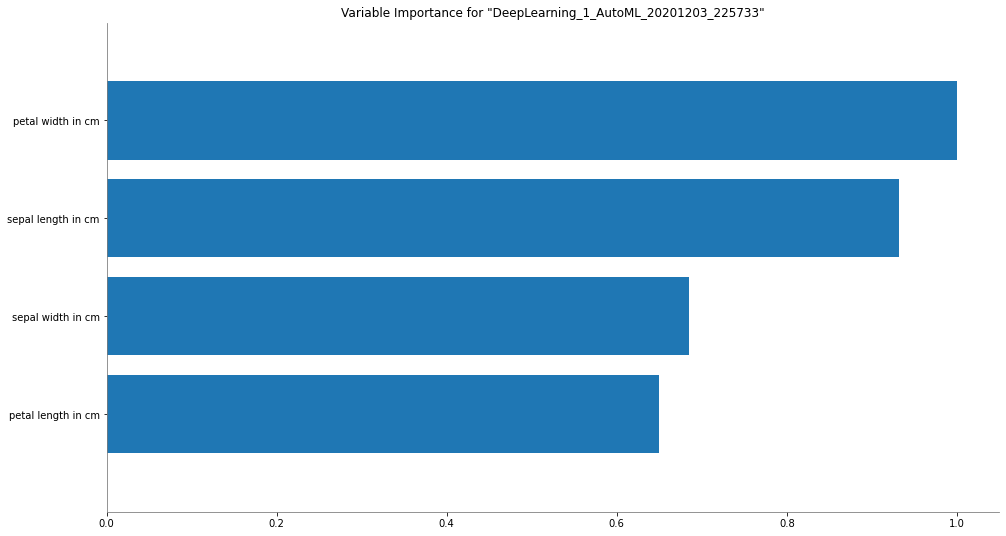

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

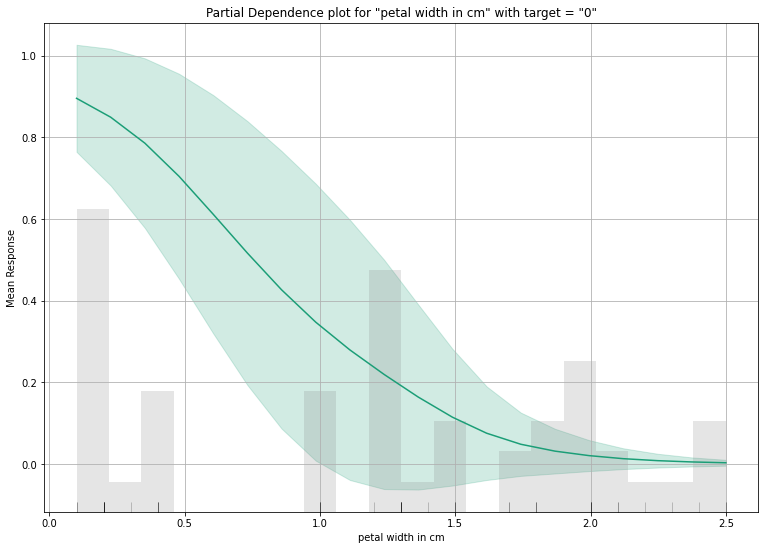

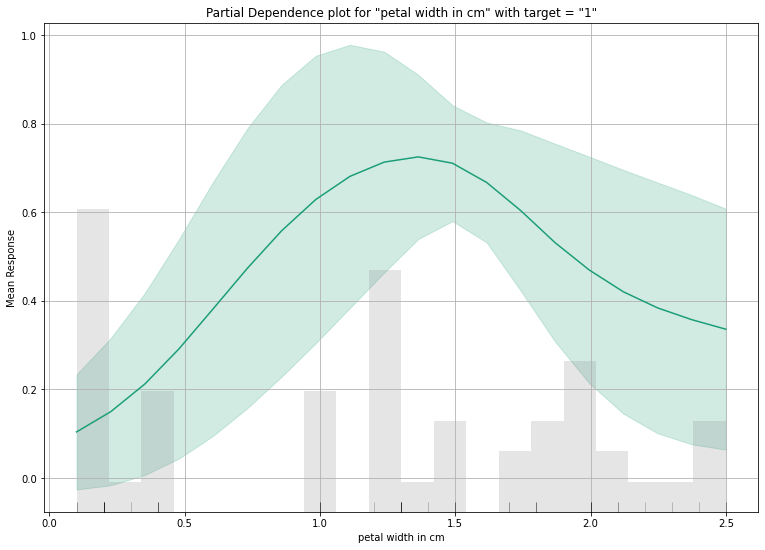

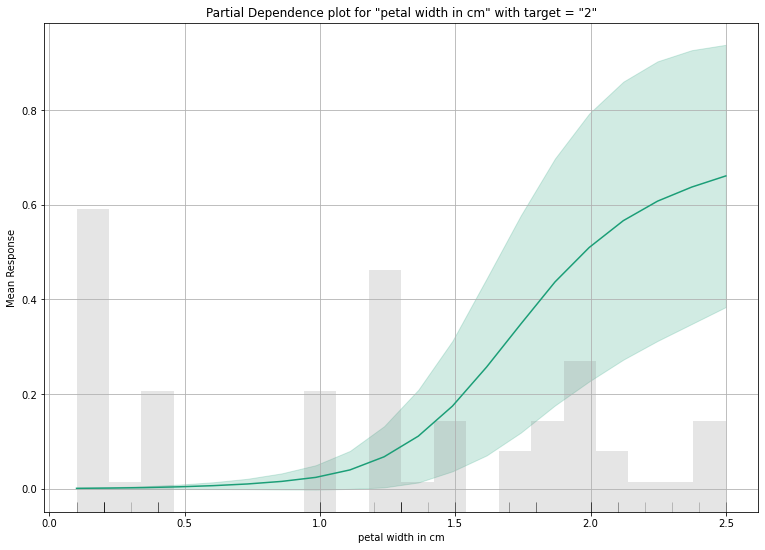

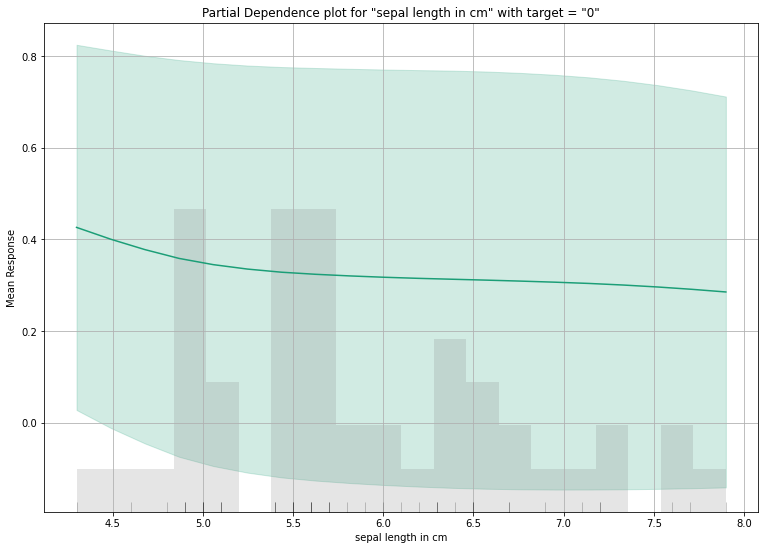

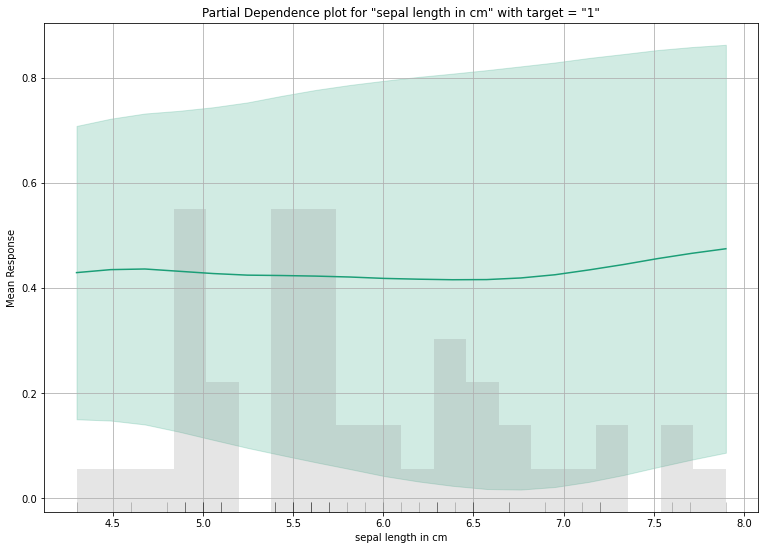

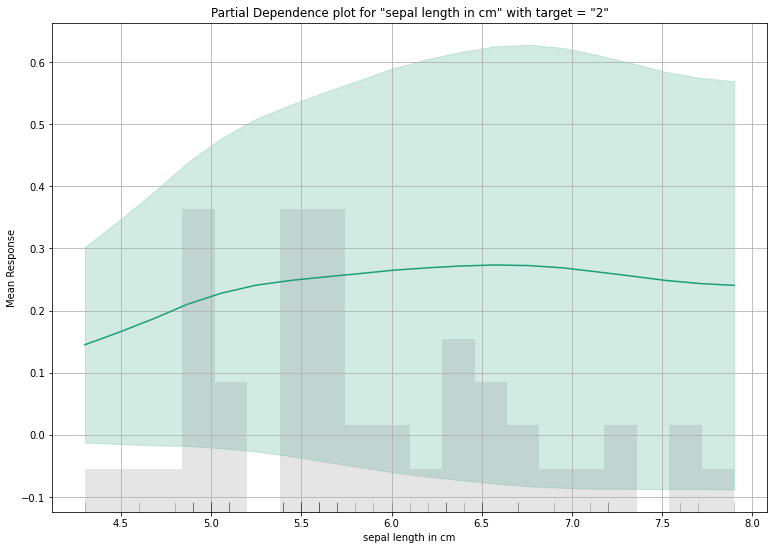

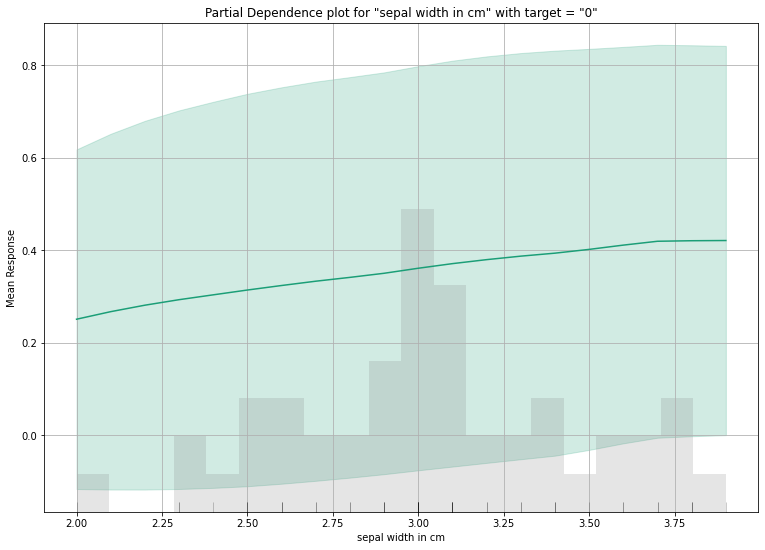

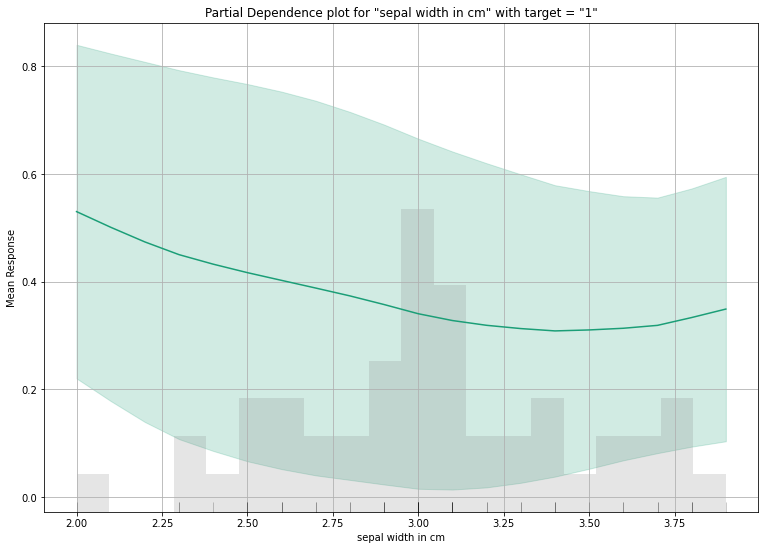

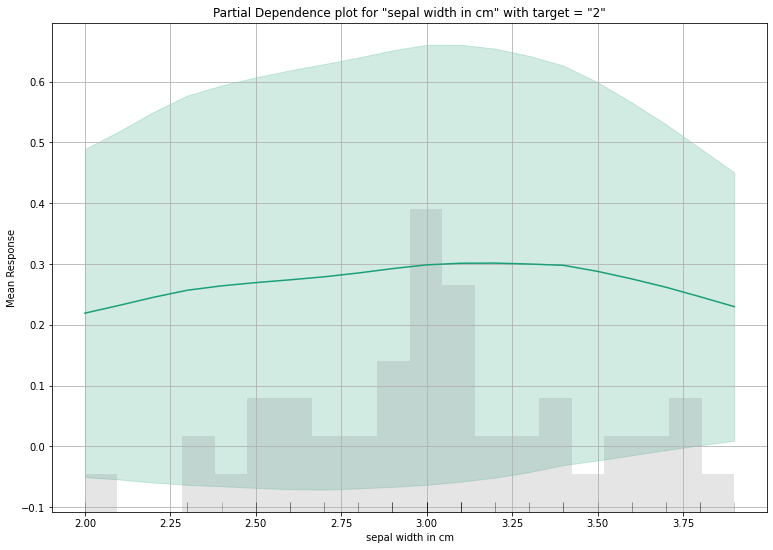

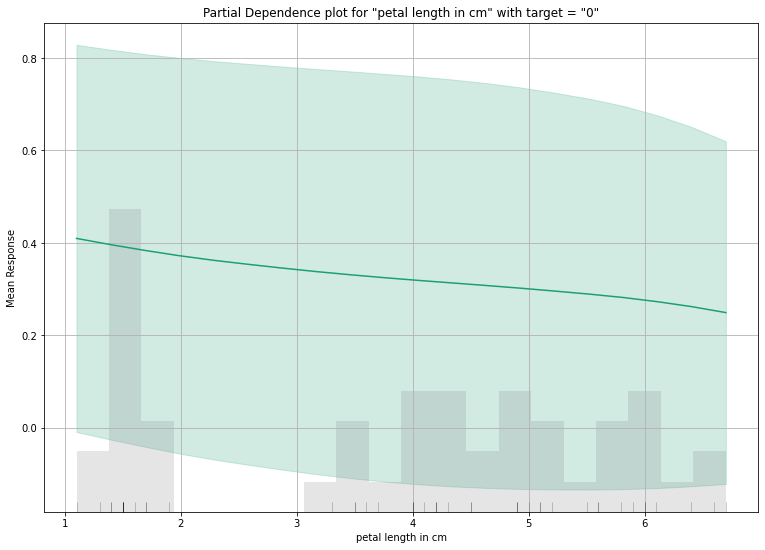

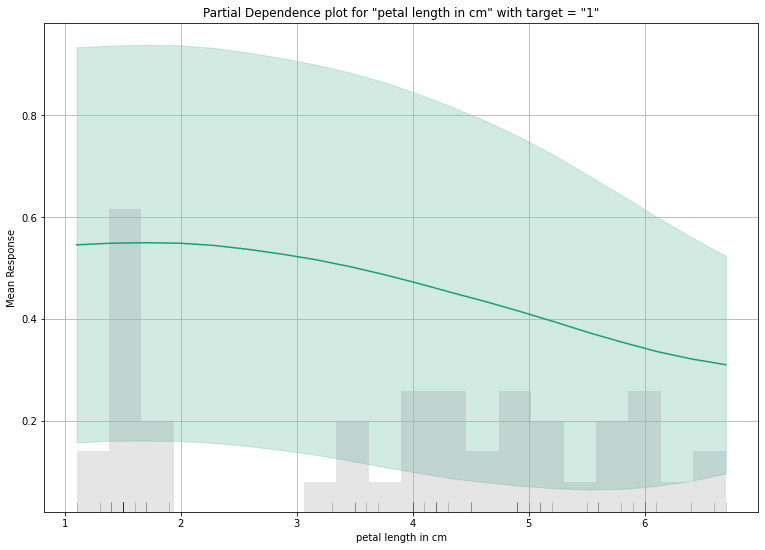

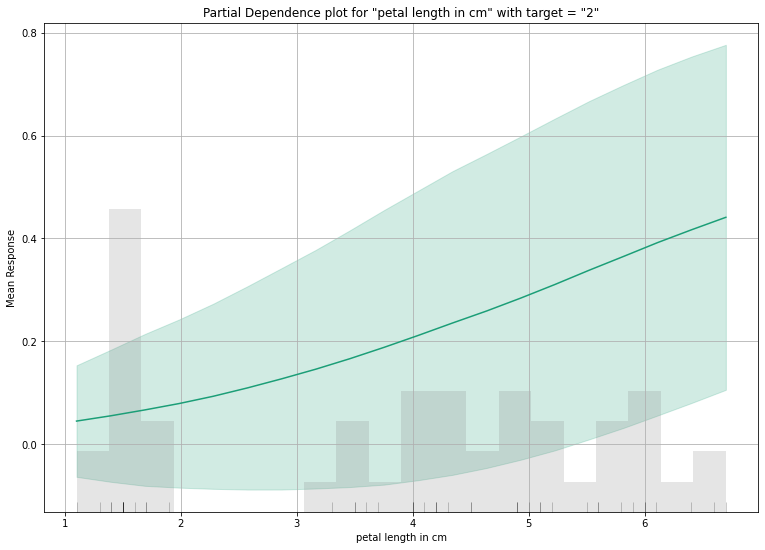

In [18]:
aml_iris.leader.explain(test_iris)

### 2) Regressão (Boston Housing Prices)

***Importando os dados***

Fazer upload de um dataset armazenado no cluster:

In [19]:
boston_data = h2o.get_frame("boston_housing.hex")

boston_data.head(3)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


Separar o dataset em conjuntos de treinamento e de teste: 

In [20]:
train_boston, test_boston = boston_data.split_frame(ratios=[.75])

x = train_boston.columns
y = 'target'
x.remove(y)

***Treinamento***

Com o dataset em mãos, podemos chamar o treinamento do modelo:

In [21]:
aml_boston = H2OAutoML(seed=1,
                project_name = 'boston_tutorial_x',
                max_models = 10)

aml_boston.train(x=x,
                 y=y,
                 training_frame=train_boston,
                 leaderboard_frame=test_boston)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [22]:
aml_boston.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
XGBoost_3_AutoML_20201203_230855,21.1565,4.59962,21.1565,2.92429,0.188704
StackedEnsemble_AllModels_AutoML_20201203_230855,21.4704,4.63361,21.4704,2.72475,0.176841
XGBoost_1_AutoML_20201203_230855,21.5928,4.64681,21.5928,2.91236,0.185842
StackedEnsemble_BestOfFamily_AutoML_20201203_230855,22.3382,4.72633,22.3382,2.75152,0.178458
XGBoost_2_AutoML_20201203_230855,24.2733,4.9268,24.2733,3.08063,0.193408
GBM_2_AutoML_20201203_230855,24.3587,4.93546,24.3587,2.9821,0.189854
GBM_4_AutoML_20201203_230855,24.3767,4.93727,24.3767,2.9121,0.186558
GBM_3_AutoML_20201203_230855,25.4492,5.04472,25.4492,2.99871,0.192732
GBM_1_AutoML_20201203_230855,25.8009,5.07946,25.8009,2.74676,0.188142
DRF_1_AutoML_20201203_230855,25.9391,5.09304,25.9391,2.9022,0.188234


Verificamos que o leaderboard tem o número de modelos solicitados mais os dois ensembles: 

In [24]:
aml_boston.leaderboard.nrows

12

Podemos verificar outros parâmetros no leaderboard:

In [25]:
lb_boston = h2o.automl.get_leaderboard(aml_boston, extra_columns = 'ALL')
lb_boston.head(3)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
XGBoost_3_AutoML_20201203_230855,21.1565,4.59962,21.1565,2.92429,0.188704,147,0.15533
StackedEnsemble_AllModels_AutoML_20201203_230855,21.4704,4.63361,21.4704,2.72475,0.176841,412,0.520488
XGBoost_1_AutoML_20201203_230855,21.5928,4.64681,21.5928,2.91236,0.185842,149,0.068667


***Salvando e Recuperando os modelos***

In [26]:
boston_model = h2o.get_model('StackedEnsemble_BestOfFamily_AutoML_20201129_015259')

In [27]:
# Binário
h2o.save_model(boston_model, path = 'gs://hurb_transient/INTERNAL/DATA_SCIENCE/tutorials/tutorial_training', force = True)

# MOJO
boston_model.save_mojo('gs://hurb_transient/INTERNAL/DATA_SCIENCE/tutorials/boston_mojo')

'gs://hurb_transient/INTERNAL/DATA_SCIENCE/tutorials/boston_mojo/StackedEnsemble_BestOfFamily_AutoML_20201129_015259.zip'

***Predição***

In [28]:
aml_boston.leader.predict(test_boston.tail(5))

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict
11.1446
20.6939
21.5376
20.8484
19.8049


In [29]:
test_boston.tail(5)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0.18337,0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7
0.17783,0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.1,17.5
0.22438,0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.9,14.33,16.8
0.06076,0,11.93,0,0.573,6.976,91,2.1675,1,273,21,396.9,5.64,23.9
0.04741,0,11.93,0,0.573,6.03,80.8,2.505,1,273,21,396.9,7.88,11.9


***Explorando o modelo***

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
XGBoost_3_AutoML_20201203_230855,21.1565,4.59962,21.1565,2.92429,0.188704,147,0.15533
StackedEnsemble_AllModels_AutoML_20201203_230855,21.4704,4.63361,21.4704,2.72475,0.176841,412,0.520488
XGBoost_1_AutoML_20201203_230855,21.5928,4.64681,21.5928,2.91236,0.185842,149,0.068667
StackedEnsemble_BestOfFamily_AutoML_20201203_230855,22.3382,4.72633,22.3382,2.75152,0.178458,259,0.26533
XGBoost_2_AutoML_20201203_230855,24.2733,4.9268,24.2733,3.08063,0.193408,159,0.080785
GBM_2_AutoML_20201203_230855,24.3587,4.93546,24.3587,2.9821,0.189854,1425,0.062049
GBM_4_AutoML_20201203_230855,24.3767,4.93727,24.3767,2.9121,0.186558,1887,0.063213
GBM_3_AutoML_20201203_230855,25.4492,5.04472,25.4492,2.99871,0.192732,1724,0.071758
GBM_1_AutoML_20201203_230855,25.8009,5.07946,25.8009,2.74676,0.188142,1340,0.065007
DRF_1_AutoML_20201203_230855,25.9391,5.09304,25.9391,2.9022,0.188234,2097,0.085995


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

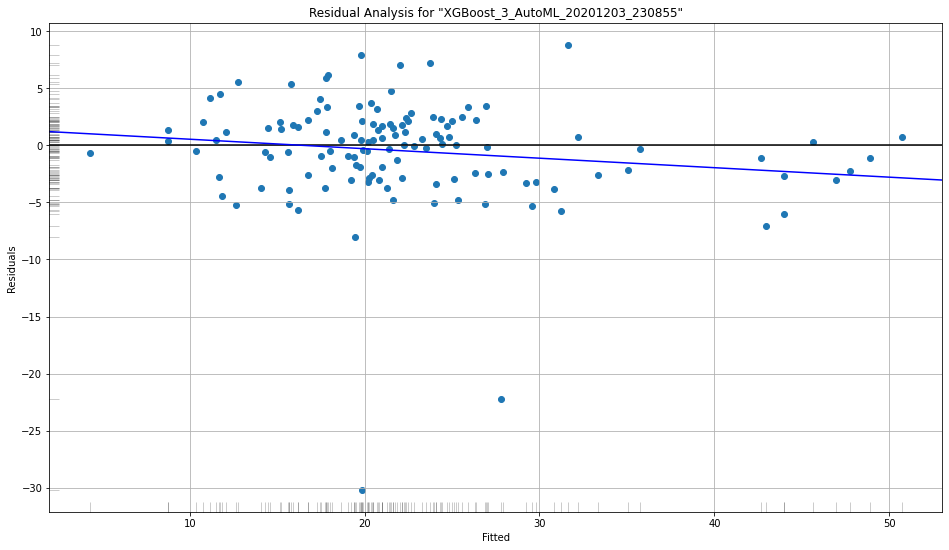

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

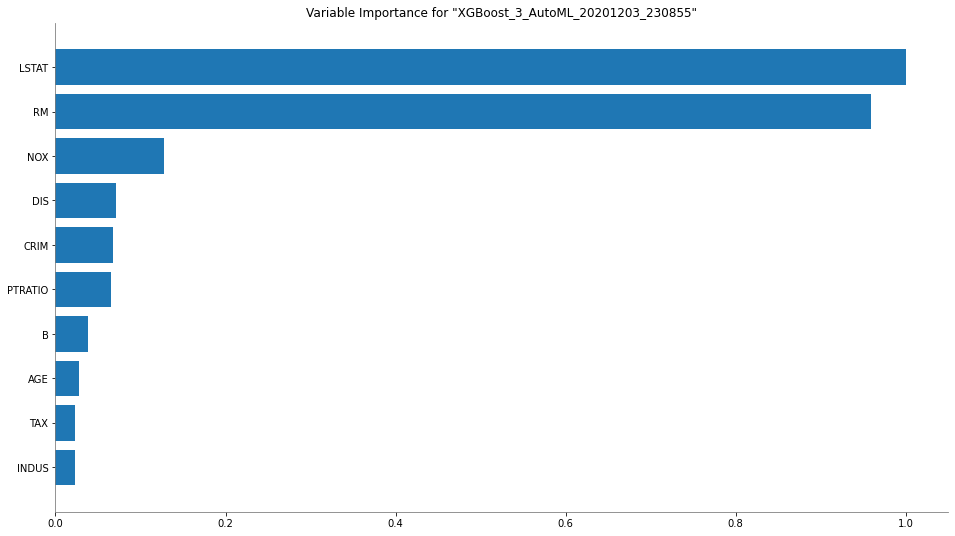

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

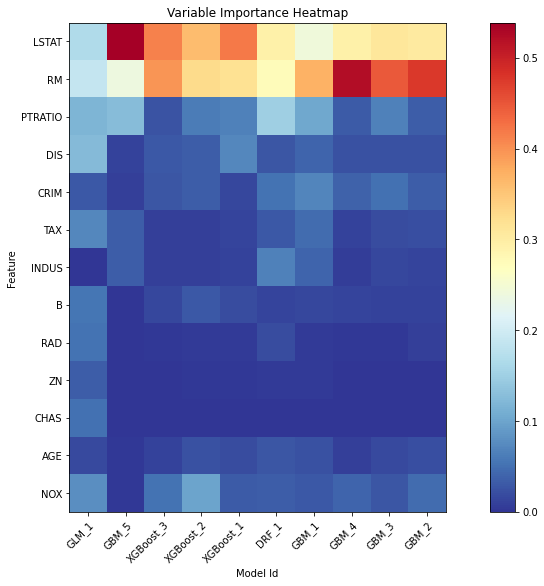

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

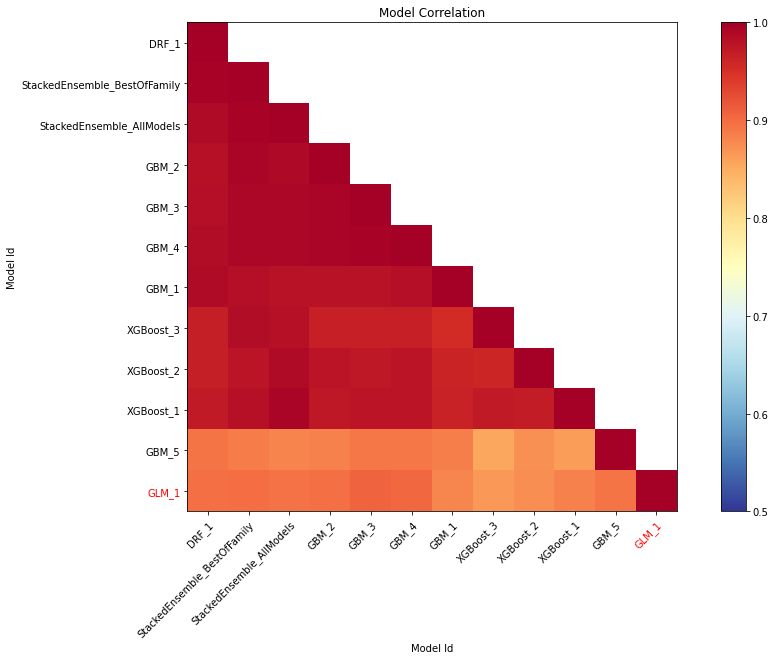

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

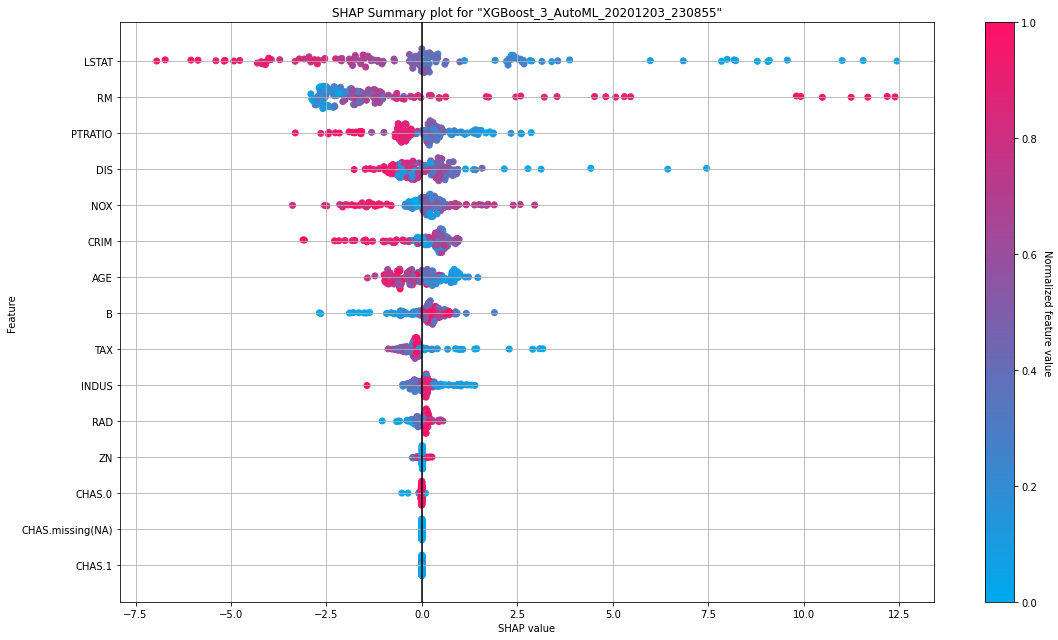

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

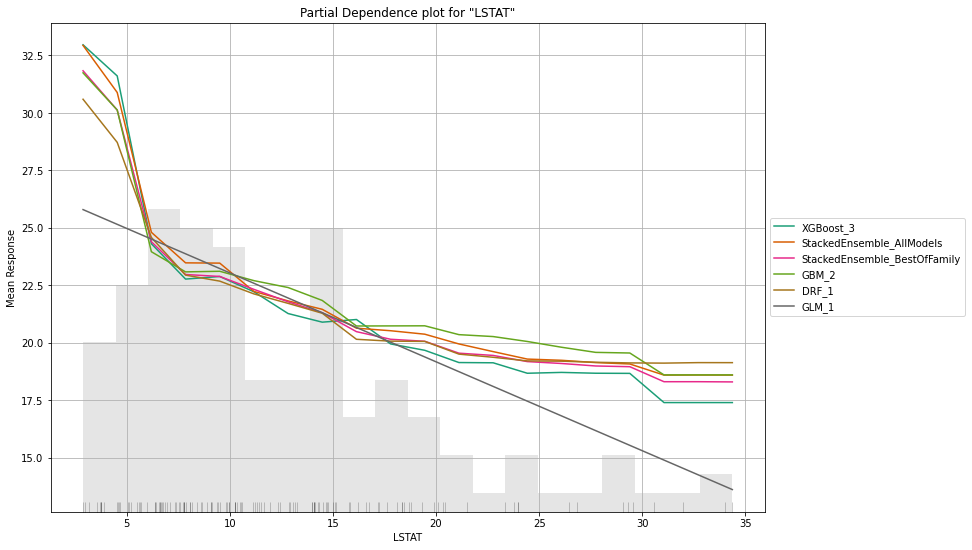

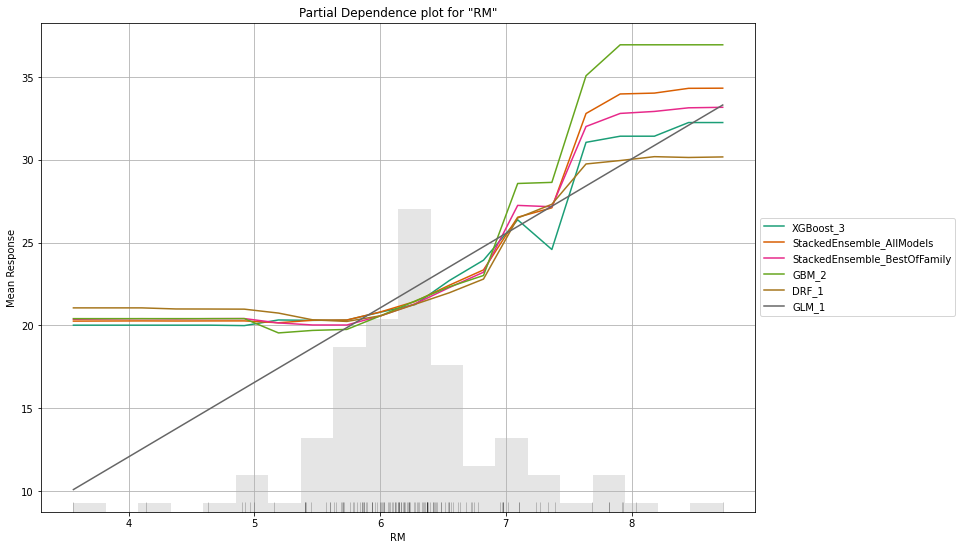

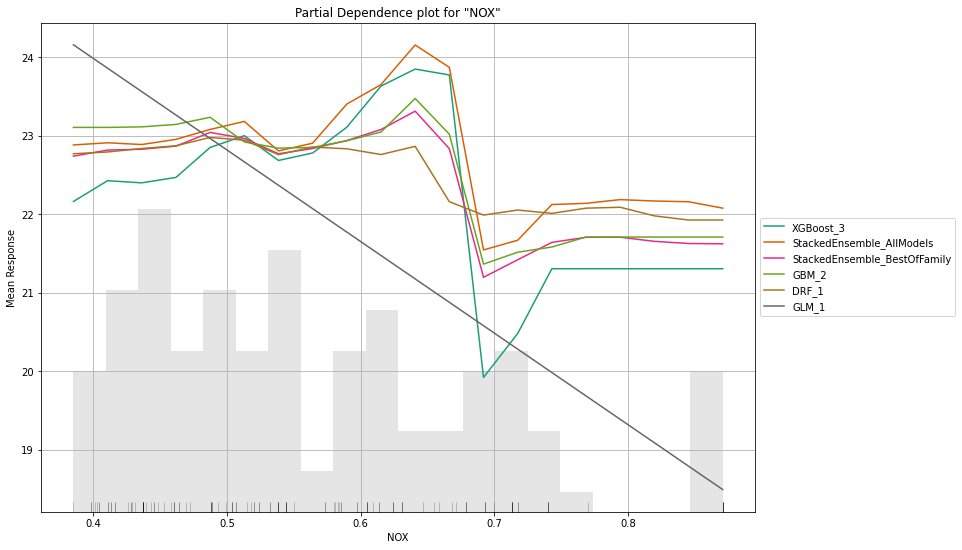

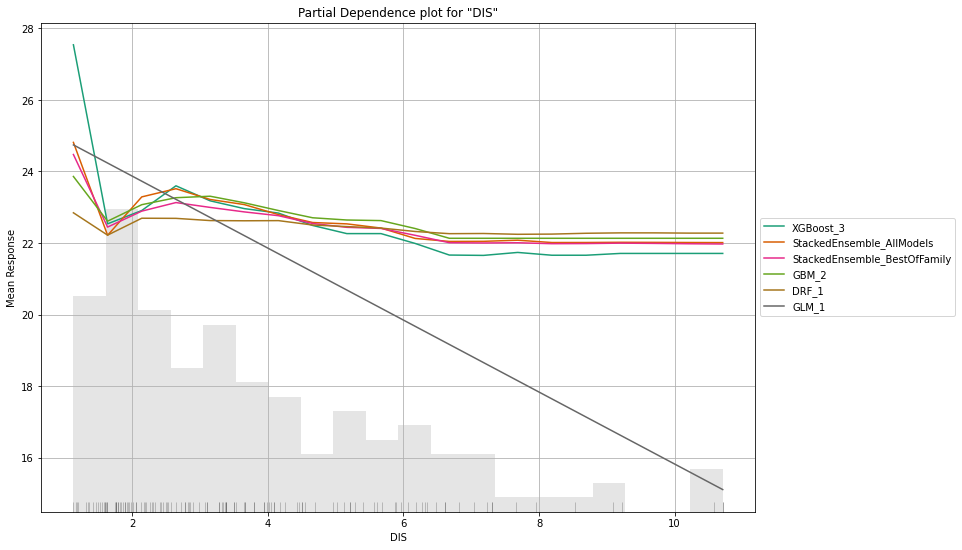

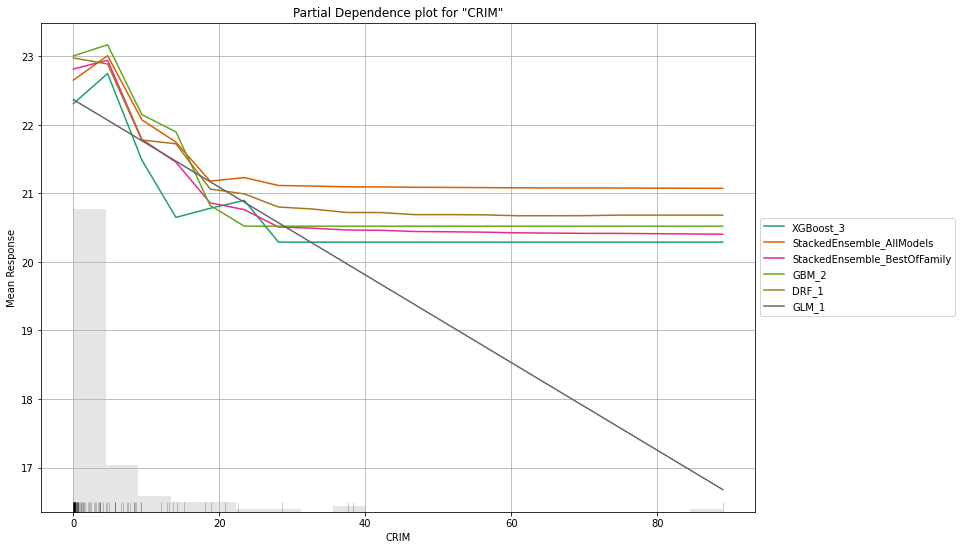

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

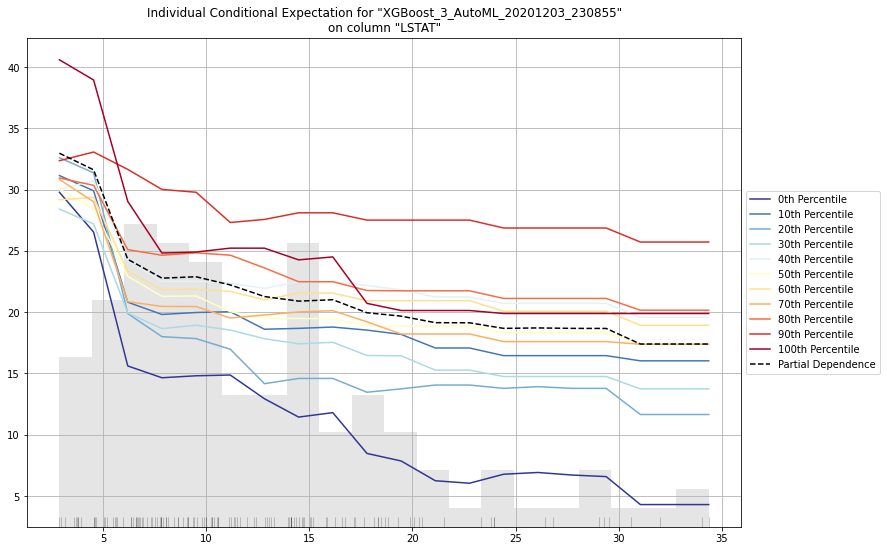

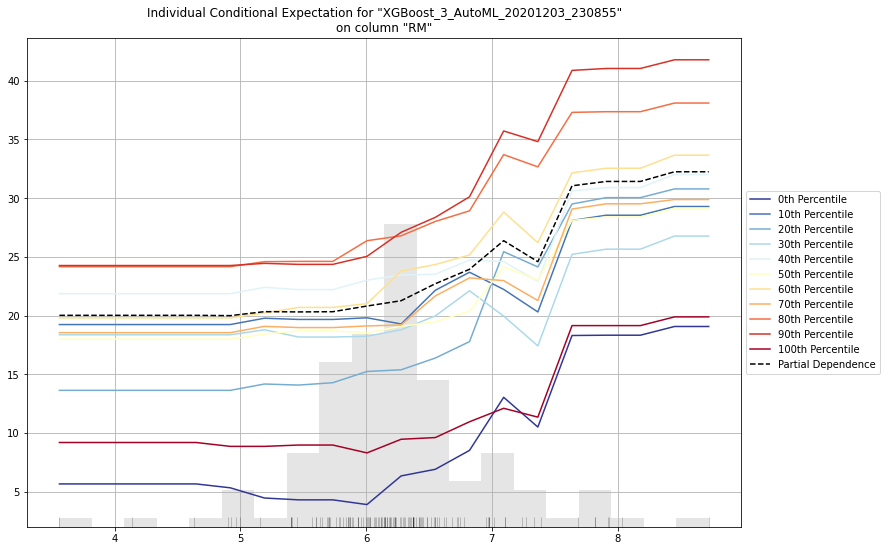

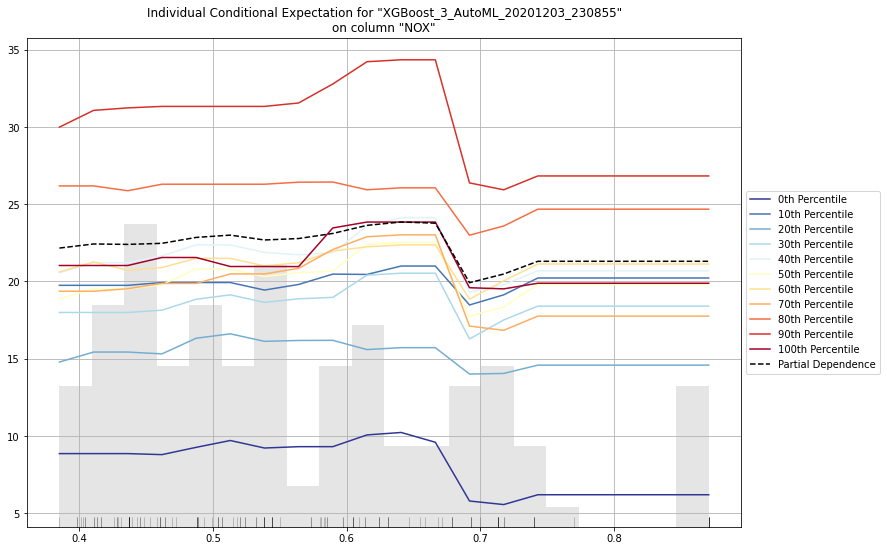

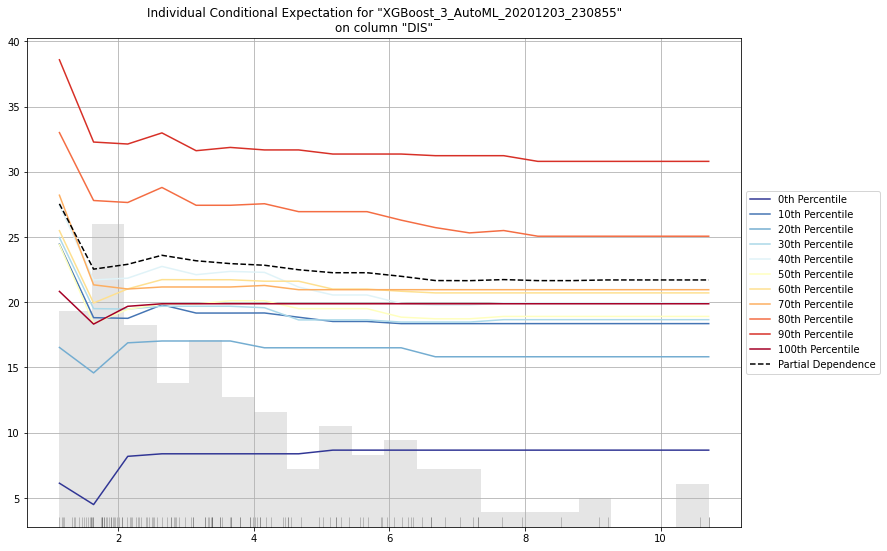

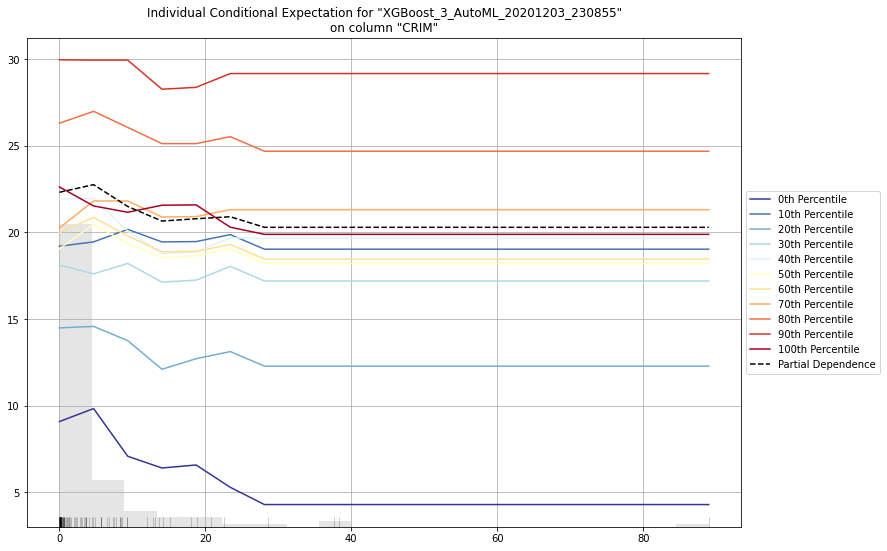

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,mean_residual_deviance,rmse,mse,mae,rmsle,training_time_ms,predict_time_per_row_ms
XGBoost_3_AutoML_20201203_230855,21.1565,4.59962,21.1565,2.92429,0.188704,147,0.15533
StackedEnsemble_AllModels_AutoML_20201203_230855,21.4704,4.63361,21.4704,2.72475,0.176841,412,0.520488
XGBoost_1_AutoML_20201203_230855,21.5928,4.64681,21.5928,2.91236,0.185842,149,0.068667
StackedEnsemble_BestOfFamily_AutoML_20201203_230855,22.3382,4.72633,22.3382,2.75152,0.178458,259,0.26533
XGBoost_2_AutoML_20201203_230855,24.2733,4.9268,24.2733,3.08063,0.193408,159,0.080785
GBM_2_AutoML_20201203_230855,24.3587,4.93546,24.3587,2.9821,0.189854,1425,0.062049
GBM_4_AutoML_20201203_230855,24.3767,4.93727,24.3767,2.9121,0.186558,1887,0.063213
GBM_3_AutoML_20201203_230855,25.4492,5.04472,25.4492,2.99871,0.192732,1724,0.071758
GBM_1_AutoML_20201203_230855,25.8009,5.07946,25.8009,2.74676,0.188142,1340,0.065007
DRF_1_AutoML_20201203_230855,25.9391,5.09304,25.9391,2.9022,0.188234,2097,0.085995


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

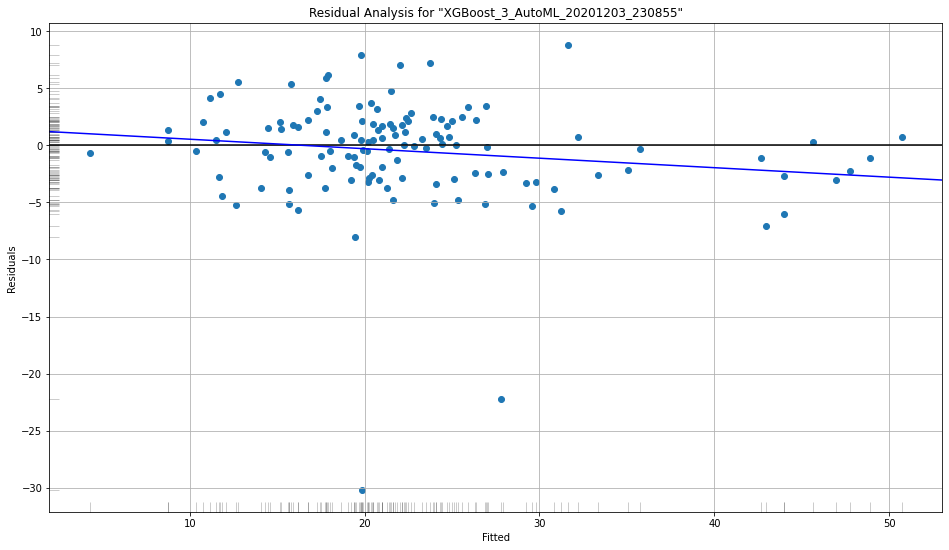

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

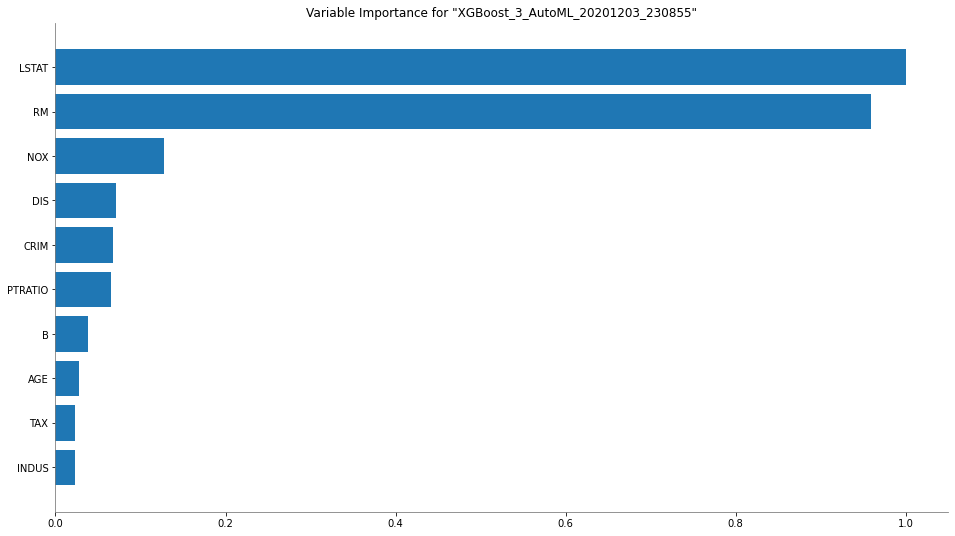

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

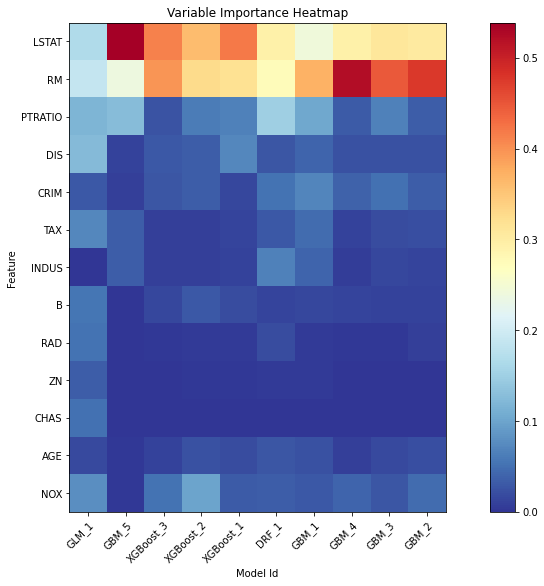

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

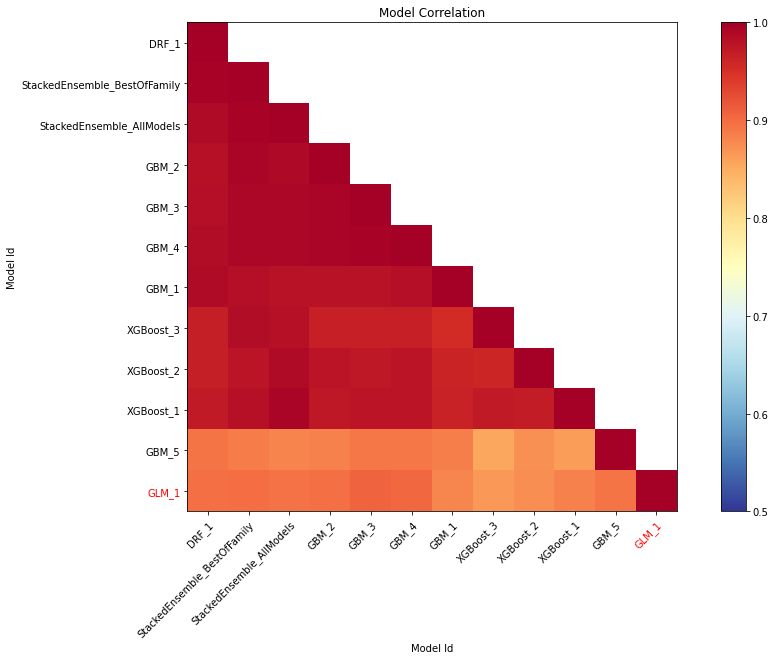

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

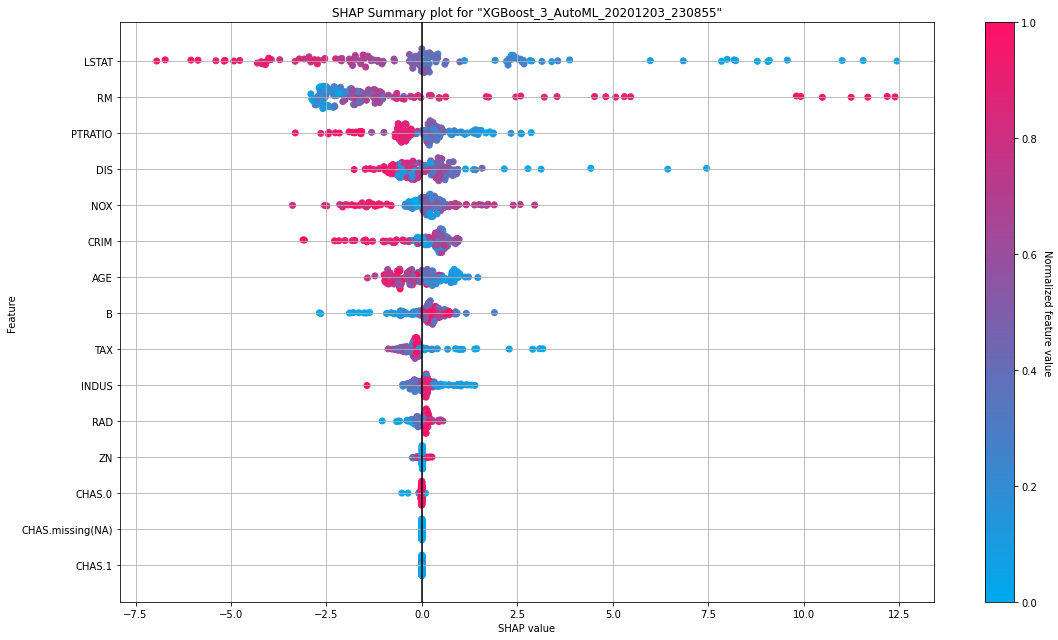

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

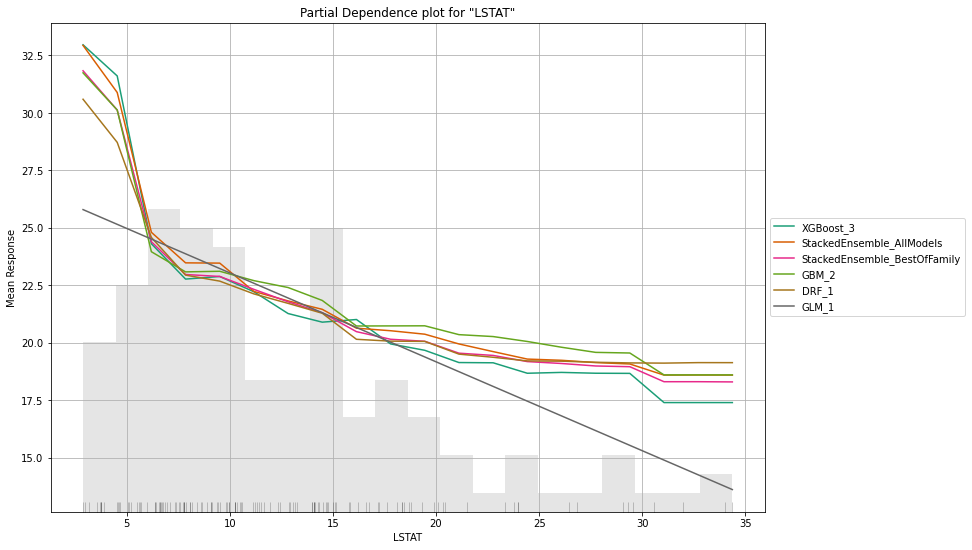

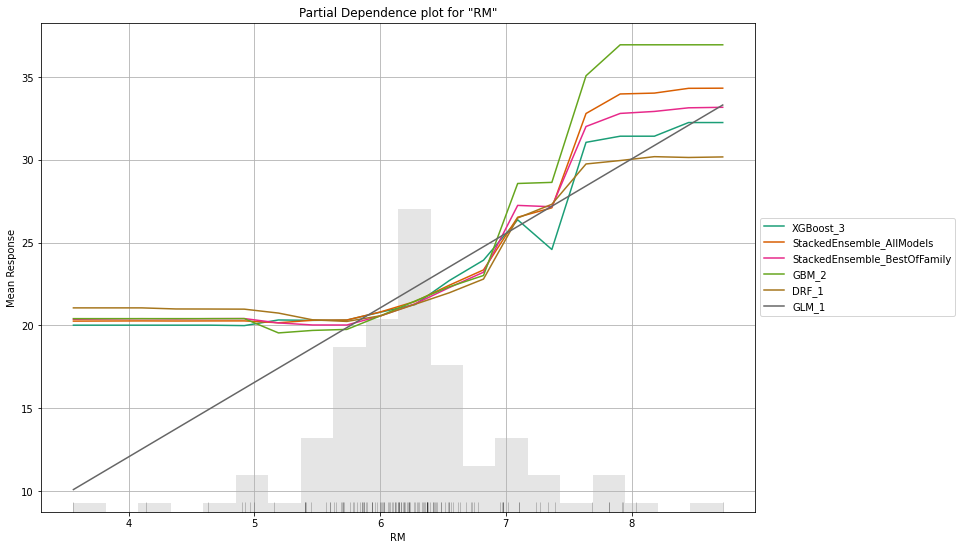

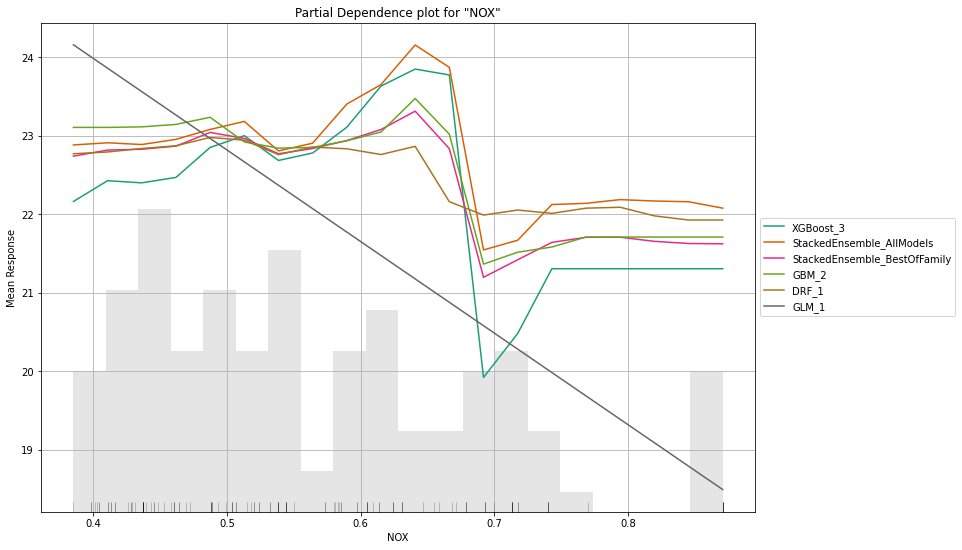

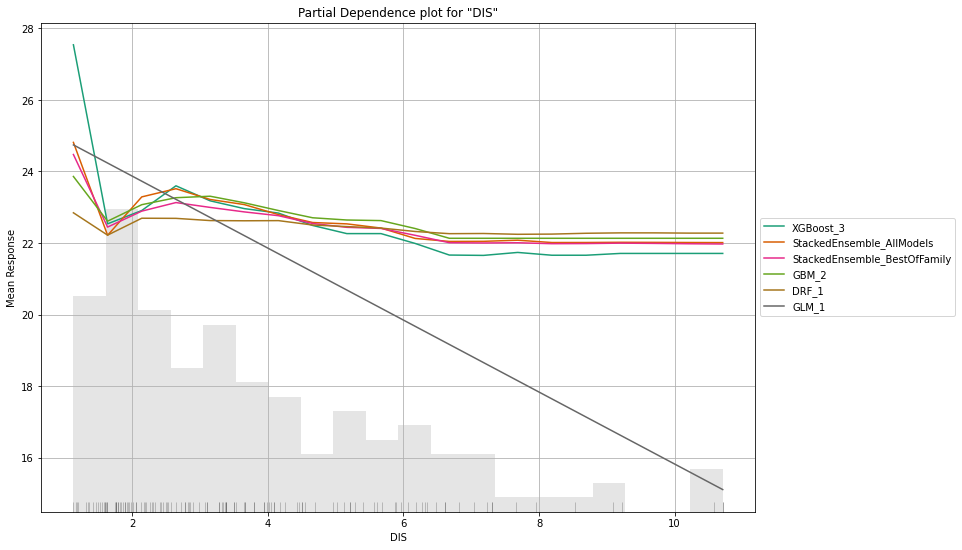

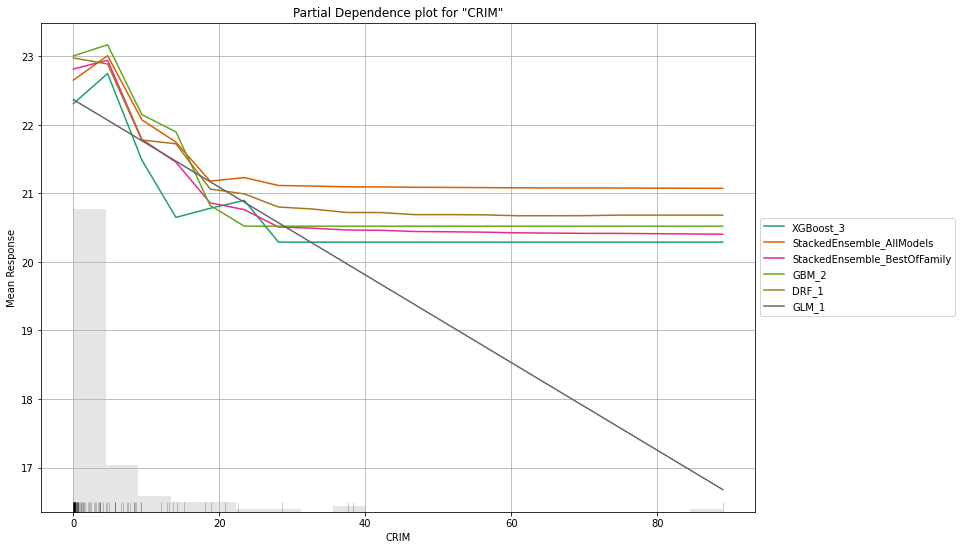

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

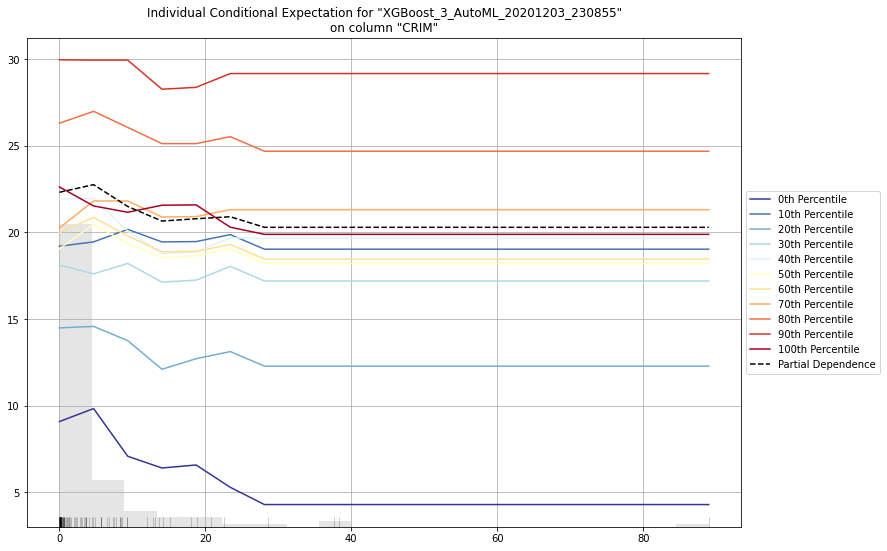

In [30]:
aml_boston.explain(test_boston)

In [33]:
aml_boston.leader.r2()

0.9933794838626373